In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("mental_health_data final data.csv")

# Check the first few rows|
print(df.head())



   User_ID  Age             Gender   Occupation    Country  \
0        1   36               Male    Education  Australia   
1        2   48               Male  Engineering      Other   
2        3   18  Prefer not to say        Sales      India   
3        4   30         Non-binary  Engineering  Australia   
4        5   58               Male           IT        USA   

  Mental_Health_Condition Severity Consultation_History Stress_Level  \
0                     Yes      NaN                  Yes          Low   
1                      No      Low                   No          Low   
2                      No      NaN                  Yes       Medium   
3                      No   Medium                   No          Low   
4                     Yes      NaN                  Yes         High   

   Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  \
0          7.6          46                        8                 2.2   
1          6.8          74                  

In [3]:
df.columns = [
    "User_ID", "Age", "Gender", "Occupation", "Country", "Mental_Health_Condition",
    "Severity", "Consultation_History", "Stress_Level", "Sleep_Hours", "Work_Hours",
    "Physical_Activity_Hours", "Social_Media_Usage", "Diet_Quality", "Smoking_Habit",
    "Alcohol_Consumption", "Medication_Usage"
]

# remove the id column
df = df.drop(columns=["User_ID"])

In [72]:



import numpy as np

# Set threshold for maximum missing values to fill (e.g., 50%)
MISSING_THRESHOLD = 0.5  # Don't fill if more than 50% is missing

print("Missing values before cleaning:")
missing_before = df.isnull().sum()
print(missing_before[missing_before > 0])
print(f"Total missing values: {missing_before.sum()}")
print(f"Dataset size: {len(df)} rows")
print()

# Identify problematic columns
problematic_cols = []
for col in missing_before[missing_before > 0].index:
    missing_pct = missing_before[col] / len(df)
    print(f"'{col}': {missing_before[col]} missing ({missing_pct:.1%})")
    if missing_pct > MISSING_THRESHOLD:
        problematic_cols.append(col)

if problematic_cols:
    print(f"\n⚠️  COLUMNS TO DROP (>{MISSING_THRESHOLD:.0%} missing):")
    for col in problematic_cols:
        missing_pct = missing_before[col] / len(df)
        print(f"  - '{col}': {missing_pct:.1%} missing")
    
    # Drop problematic columns
    df = df.drop(columns=problematic_cols)
    print(f"\nDropped {len(problematic_cols)} columns with excessive missing values")

print(f"\nProceeding with cleaning for remaining columns...")
print()

# Fill missing numeric values with median (only for columns with reasonable missing data)
numeric_filled = 0
for col in df.select_dtypes(include=[np.number]).columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        missing_pct = missing_count / len(df)
        if missing_pct <= MISSING_THRESHOLD:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            numeric_filled += missing_count
            print(f"Filled {missing_count} missing values in '{col}' with median ({median_val})")
        else:
            print(f"Skipped '{col}': {missing_pct:.1%} missing (above threshold)")

# Fill missing categorical values with mode (only for columns with reasonable missing data)
categorical_filled = 0
for col in df.select_dtypes(include=[object]).columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        missing_pct = missing_count / len(df)
        if missing_pct <= MISSING_THRESHOLD:
            mode = df[col].mode(dropna=True)
            fill_value = mode[0] if not mode.empty else "Unknown"
            df[col] = df[col].fillna(fill_value)
            categorical_filled += missing_count
            print(f"Filled {missing_count} missing values in '{col}' with mode ('{fill_value}')")
        else:
            print(f"Skipped '{col}': {missing_pct:.1%} missing (above threshold)")

# Summary
remaining_missing = df.isnull().sum().sum()
print(f"\nCleaning Summary:")
print(f"- Columns dropped: {len(problematic_cols)}")
print(f"- Numeric values filled: {numeric_filled}")
print(f"- Categorical values filled: {categorical_filled}")
print(f"- Total values filled: {numeric_filled + categorical_filled}")
print(f"- Remaining missing values: {remaining_missing}")

if remaining_missing > 0:
    print(f"\nColumns still with missing values:")
    remaining = df.isnull().sum()
    for col in remaining[remaining > 0].index:
        missing_pct = remaining[col] / len(df)
        print(f"  - '{col}': {remaining[col]} missing ({missing_pct:.1%})")

Missing values before cleaning:
Series([], dtype: int64)
Total missing values: 0
Dataset size: 50000 rows


Proceeding with cleaning for remaining columns...


Cleaning Summary:
- Columns dropped: 0
- Numeric values filled: 0
- Categorical values filled: 0
- Total values filled: 0
- Remaining missing values: 0


In [4]:


# Standardize text data (title case) with summary tracking
text_columns = df.select_dtypes(include=[object]).columns
total_changes = 0

for col in text_columns:
    # Store original values for comparison
    original_values = df[col].astype(str).copy()
    
    # Apply standardization
    df[col] = df[col].astype(str).str.strip().str.title()
    
    # Count changes
    changes = (original_values != df[col]).sum()
    total_changes += changes

# Print summary
print(f"Text Standardization Summary:")
print(f"- Processed {len(text_columns)} text columns")
print(f"- Total values changed: {total_changes}")
print(f"- Applied: strip whitespace + title case formatting")

Text Standardization Summary:
- Processed 11 text columns
- Total values changed: 71411
- Applied: strip whitespace + title case formatting


In [16]:
# df = df.drop_duplicates()

# Drop duplicates with summary tracking
rows_before = len(df)
df = df.drop_duplicates()
rows_after = len(df)
duplicates_removed = rows_before - rows_after

# Print summary
print(f"Duplicate Removal Summary:")
print(f"- Rows before: {rows_before}")
print(f"- Rows after: {rows_after}")
print(f"- Duplicates removed: {duplicates_removed}")
if rows_before > 0:
    print(f"- Percentage removed: {(duplicates_removed/rows_before)*100:.1f}%")


Duplicate Removal Summary:
- Rows before: 50000
- Rows after: 50000
- Duplicates removed: 0
- Percentage removed: 0.0%


In [5]:


# Filter age range with summary tracking
rows_before = len(df)
df = df[(df['Age'] >= 10) & (df['Age'] <= 100)]
rows_after = len(df)
rows_filtered = rows_before - rows_after

# Print summary
print(f"Age Filtering Summary:")
print(f"- Rows before: {rows_before}")
print(f"- Rows after: {rows_after}")
print(f"- Rows filtered out: {rows_filtered}")
print(f"- Kept rows with Age between 10-100")
if rows_before > 0:
    print(f"- Percentage filtered: {(rows_filtered/rows_before)*100:.1f}%")

Age Filtering Summary:
- Rows before: 50000
- Rows after: 50000
- Rows filtered out: 0
- Kept rows with Age between 10-100
- Percentage filtered: 0.0%


In [6]:
print(" Cleaning complete!")
print("Cleaned shape:", df.shape)
print(df.head())


 Cleaning complete!
Cleaned shape: (50000, 16)
   Age             Gender   Occupation    Country Mental_Health_Condition  \
0   36               Male    Education  Australia                     Yes   
1   48               Male  Engineering      Other                      No   
2   18  Prefer Not To Say        Sales      India                      No   
3   30         Non-Binary  Engineering  Australia                      No   
4   58               Male           It        Usa                     Yes   

  Severity Consultation_History Stress_Level  Sleep_Hours  Work_Hours  \
0      Nan                  Yes          Low          7.6          46   
1      Low                   No          Low          6.8          74   
2      Nan                  Yes       Medium          7.1          77   
3   Medium                   No          Low          6.9          57   
4      Nan                  Yes         High          4.7          45   

   Physical_Activity_Hours  Social_Media_Usage Diet

In [7]:


# print(" Encoding complete.")


from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Track encoding process
text_columns = df_encoded.select_dtypes(include=[object]).columns
label_encoders = {}

for col in text_columns:
    le = LabelEncoder()
    unique_before = df_encoded[col].nunique()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Print summary
print(f"Label Encoding Summary:")
print(f"- Encoded {len(text_columns)} categorical columns")
print(f"- Converted text values to numeric labels (0, 1, 2, ...)")
print(f"- Created label encoders for reverse mapping")
if len(text_columns) > 0:
    print(f"- Columns encoded: {list(text_columns)}")
print("✅ Encoding complete.")

Label Encoding Summary:
- Encoded 11 categorical columns
- Converted text values to numeric labels (0, 1, 2, ...)
- Created label encoders for reverse mapping
- Columns encoded: ['Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity', 'Consultation_History', 'Stress_Level', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption', 'Medication_Usage']
✅ Encoding complete.


In [8]:


# print(" Scaling complete. Data ready for model training.")


from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop("Mental_Health_Condition", axis=1)
y = df_encoded["Mental_Health_Condition"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print summary
print(f"Feature Scaling Summary:")
print(f"- Separated {X.shape[1]} features from 1 target variable")
print(f"- Target variable: 'Mental_Health_Condition'")
print(f"- Applied StandardScaler to features (mean=0, std=1)")
print(f"- Dataset shape: {X.shape[0]} samples × {X.shape[1]} features")
print(" Scaling complete. Data ready for model training.")

Feature Scaling Summary:
- Separated 15 features from 1 target variable
- Target variable: 'Mental_Health_Condition'
- Applied StandardScaler to features (mean=0, std=1)
- Dataset shape: 50000 samples × 15 features
 Scaling complete. Data ready for model training.


In [9]:
# 1. Full summary for numeric and categorical variables
print("📊 Descriptive Statistics (All Columns):")
print(df.describe(include='all'))


📊 Descriptive Statistics (All Columns):
                 Age  Gender Occupation Country Mental_Health_Condition  \
count   50000.000000   50000      50000   50000                   50000   
unique           NaN       4          7       7                       2   
top              NaN  Female    Finance   India                      No   
freq             NaN   12633       7286    7323                   25003   
mean       41.473080     NaN        NaN     NaN                     NaN   
std        13.844185     NaN        NaN     NaN                     NaN   
min        18.000000     NaN        NaN     NaN                     NaN   
25%        29.000000     NaN        NaN     NaN                     NaN   
50%        41.000000     NaN        NaN     NaN                     NaN   
75%        53.000000     NaN        NaN     NaN                     NaN   
max        65.000000     NaN        NaN     NaN                     NaN   

       Severity Consultation_History Stress_Level   Sleep_H

In [10]:
print(" Column Data Types:")
print(df.dtypes)


 Column Data Types:
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
Social_Media_Usage         float64
Diet_Quality                object
Smoking_Habit               object
Alcohol_Consumption         object
Medication_Usage            object
dtype: object


In [20]:
print(" Unique Values in Each Column:")
print(df.nunique())


 Unique Values in Each Column:
Age                        48
Gender                      4
Occupation                  7
Country                     7
Mental_Health_Condition     2
Consultation_History        2
Stress_Level                3
Sleep_Hours                61
Work_Hours                 51
Physical_Activity_Hours    11
Social_Media_Usage         56
Diet_Quality                3
Smoking_Habit               4
Alcohol_Consumption         4
Medication_Usage            2
dtype: int64


In [11]:
print(" Mental Health Condition Distribution:")
print(df["Mental_Health_Condition"].value_counts())


 Mental Health Condition Distribution:
Mental_Health_Condition
No     25003
Yes    24997
Name: count, dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Rugero Olsen\AppData\Local\Temp\ipykernel_15536\2208766307.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stress_Level', data=df, palette='viridis')


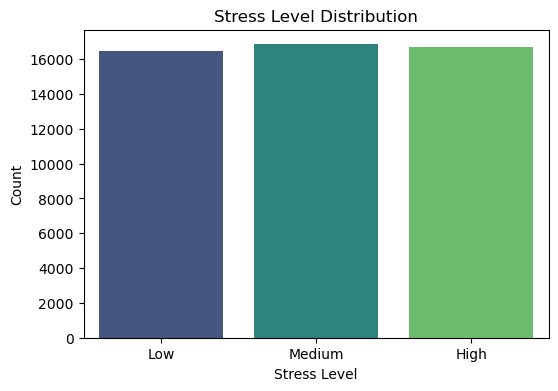

In [13]:
# plt.figure(figsize=(6, 4))
# sns.countplot(x='Mental_Health_Condition', data=df, palette='viridis')
# plt.title('Mental_Health_Condition Distribution')
# plt.xlabel('Mental_Health_Condition')
# plt.ylabel('Count')
# plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x='Stress_Level', data=df, palette='viridis')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()


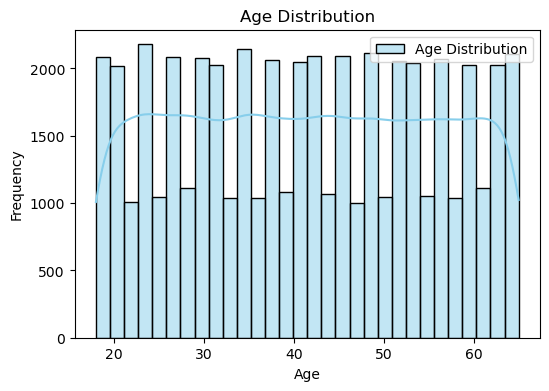

In [14]:
# plt.figure(figsize=(6, 4))
# sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()



plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue', label='Age Distribution')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

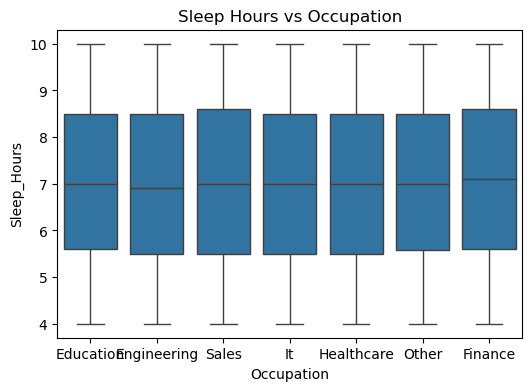

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Occupation', y='Sleep_Hours', data=df)
plt.title('Sleep Hours vs Occupation')
plt.show()


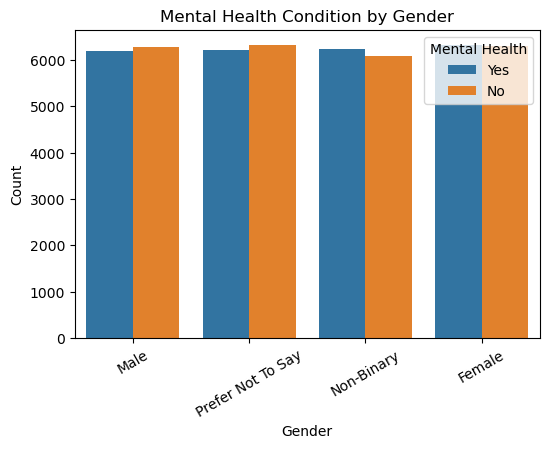

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Mental_Health_Condition', data=df)
plt.title('Mental Health Condition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Mental Health')
plt.show()


In [20]:
import pandas as pd



In [21]:
import numpy as np



In [22]:
df = pd.read_csv("cleaned_stress_data.csv")



In [6]:
import pandas as pd
import numpy as np

# Now load the dataset
df = pd.read_csv("cleaned_stress_data.csv")

# Preview the data
df.head()


,Age,Gender,Occupation,Country,Mental_Health_Condition,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,36,1,0,0,1,1,1,7.6,46,8,2.2,1,3,2,1
1,48,1,1,4,0,0,1,6.8,74,2,3.4,2,0,3,0
2,18,3,6,3,0,1,2,7.1,77,9,5.9,1,0,3,0
3,30,2,1,0,0,0,1,6.9,57,4,5.4,0,3,2,0
4,58,1,4,6,1,1,0,4.7,45,10,3.3,2,3,1,1


In [23]:
X = df.drop("Stress_Level", axis=1)  # Features
y = df["Stress_Level"]               # Target variable


In [75]:
ml_app = MLModelApplication()
X, y = ml_app.load_and_explore_data(X, y, "classification")


📊 DATA EXPLORATION
Dataset Shape: (50000, 14)
Problem Type: Classification

📈 BASIC STATISTICS:
                Age        Gender    Occupation       Country  \
count  50000.000000  50000.000000  50000.000000  50000.000000   
mean      41.473080      1.496380      2.999460      3.007340   
std       13.844185      1.121451      1.993003      1.996468   
min       18.000000      0.000000      0.000000      0.000000   
25%       29.000000      0.000000      1.000000      1.000000   
50%       41.000000      1.000000      3.000000      3.000000   
75%       53.000000      3.000000      5.000000      5.000000   
max       65.000000      3.000000      6.000000      6.000000   

       Consultation_History  Stress_Level   Sleep_Hours    Work_Hours  \
count            50000.0000  50000.000000  50000.000000  50000.000000   
mean                 0.4978      1.002800      7.009934     55.062860   
std                  0.5000      0.819198      1.732674     14.691575   
min                  0.000

In [24]:
class MLModelApplication:
    """
    Comprehensive ML Model Application Framework
    Supports Classification, Regression, and Clustering
    """
    ...


In [25]:
try:
    MLModelApplication
    print(" Class is defined")
except NameError:
    print(" MLModelApplication class is NOT defined.")


 Class is defined


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

class MLModelApplication:
    def __init__(self):
        self.scaler = StandardScaler()

    def load_and_explore_data(self, X, y):
        print("Data shape:", X.shape)
        print("Class distribution:", y.value_counts().to_dict())
        return X, y

    def preprocess_data(self, X, y):
        X = X.fillna(X.median())
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)

    def choose_and_train_model(self):
        models = {
            "RandomForest": RandomForestClassifier(random_state=42),
            "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
            "GradientBoosting": GradientBoostingClassifier(random_state=42)
        }
        best_score = 0
        for name, model in models.items():
            scores = cross_val_score(model, self.X_train, self.y_train, cv=5)
            avg_score = scores.mean()
            print(f"{name} Accuracy: {avg_score:.4f}")
            if avg_score > best_score:
                best_score = avg_score
                self.trained_model = model
        self.trained_model.fit(self.X_train, self.y_train)

    def evaluate_model(self):
        y_pred = self.trained_model.predict(self.X_test)
        print("Classification Report:\n", classification_report(self.y_test, y_pred))
        cm = confusion_matrix(self.y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()


In [26]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object'):
    X[col] = LabelEncoder().fit_transform(X[col])


<Axes: xlabel='Stress_Level', ylabel='Sleep_Hours'>

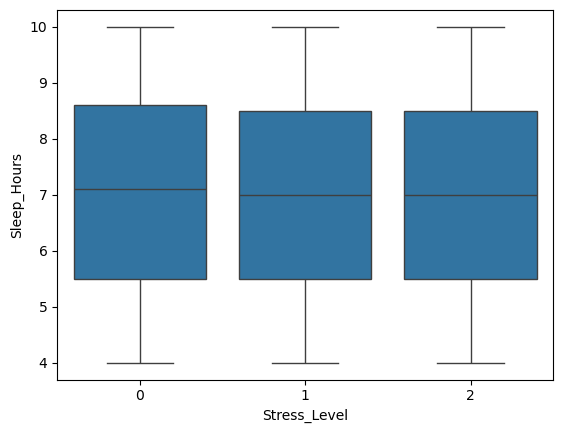

In [79]:
sns.boxplot(x='Stress_Level', y='Sleep_Hours', data=df)


In [27]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object'):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [28]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    # Classification metrics
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    
)

# Classification Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


 MACHINE LEARNING MODEL APPLICATION DEMO

 CLASSIFICATION DEMO
 DATA EXPLORATION
Dataset Shape: (1000, 10)
Problem Type: Classification

 BASIC STATISTICS:
         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.388683     0.534529    -0.078484     0.166758     0.303552   
std       2.018203     3.096914     1.856790     3.297572     1.770976   
min      -7.173891   -13.163539    -9.772810   -12.519312    -7.544301   
25%      -1.701969    -1.287058    -1.316184    -2.050871    -0.815299   
50%      -0.492066     0.468750    -0.107759     0.463204     0.378907   
75%       0.923974     2.424680     1.076819     2.422366     1.426375   
max       6.272430    10.968322     5.027060    10.680348     5.122085   

         feature_5    feature_6    feature_7    feature_8    feature_9  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean     -0.033001     0.738932

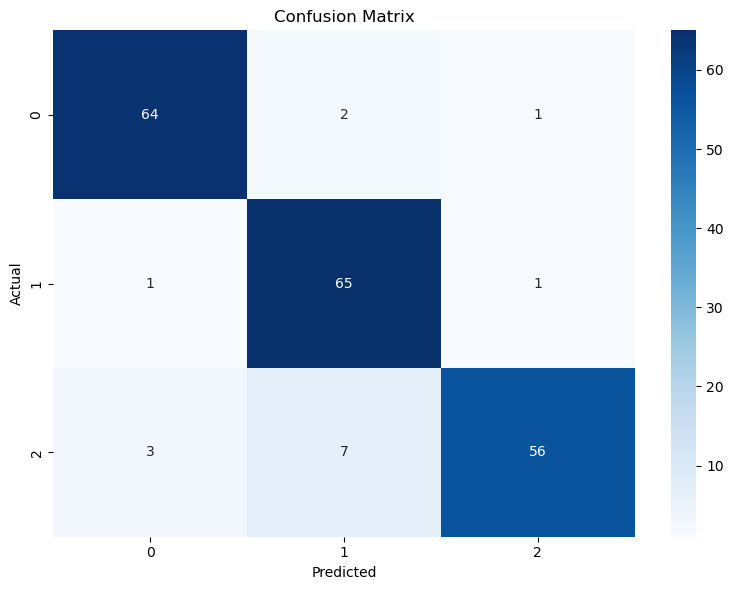


 REGRESSION DEMO
 DATA EXPLORATION
Dataset Shape: (1000, 10)
Problem Type: Regression

 BASIC STATISTICS:
         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.002689     0.010788    -0.023104     0.005495    -0.022542   
std       1.031230     1.005433     0.986846     1.030962     0.983366   
min      -2.801912    -3.922400    -3.007632    -3.601085    -3.241267   
25%      -0.744779    -0.616527    -0.650034    -0.713176    -0.702626   
50%      -0.024976     0.014006    -0.003221    -0.013284    -0.015036   
75%       0.683319     0.679698     0.608861     0.696602     0.613766   
max       3.243093     3.076860     3.377383     3.137749     3.152057   

         feature_5    feature_6    feature_7    feature_8    feature_9  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      0.031292     0.038105    -0.043075    -0.029252     0.013622  
std    

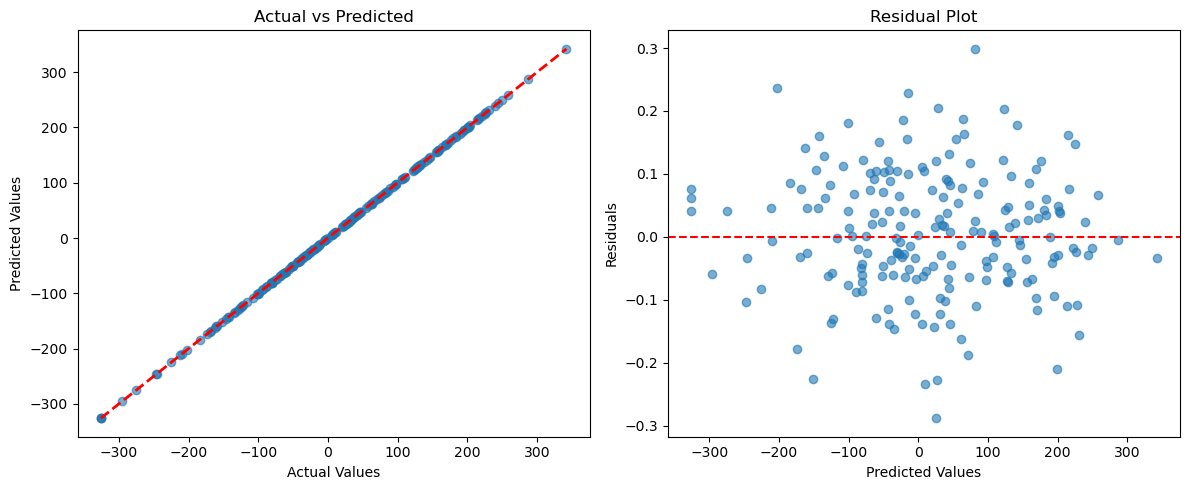


 CLUSTERING DEMO
 DATA EXPLORATION
Dataset Shape: (1000, 8)
Problem Type: Clustering

 BASIC STATISTICS:
         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -1.212189     4.821038    -3.114611     1.934899     0.951150   
std       3.015622     3.707639     5.751963     5.311175     5.268084   
min      -8.699068    -5.845723   -15.447207    -9.884671   -12.918652   
25%      -3.473203     2.234573    -7.790637    -2.162796    -2.682127   
50%      -1.511140     4.918859    -3.794577     1.197624     2.007615   
75%       1.097633     7.333941     1.394824     5.821745     4.680716   
max       8.508486    15.289783    10.797640    17.250672    11.502286   

         feature_5    feature_6    feature_7  
count  1000.000000  1000.000000  1000.000000  
mean     -7.291252    -4.369717    -2.091877  
std       2.369908     4.578006     6.103457  
min     -15.160305   -14.077818   -13.9

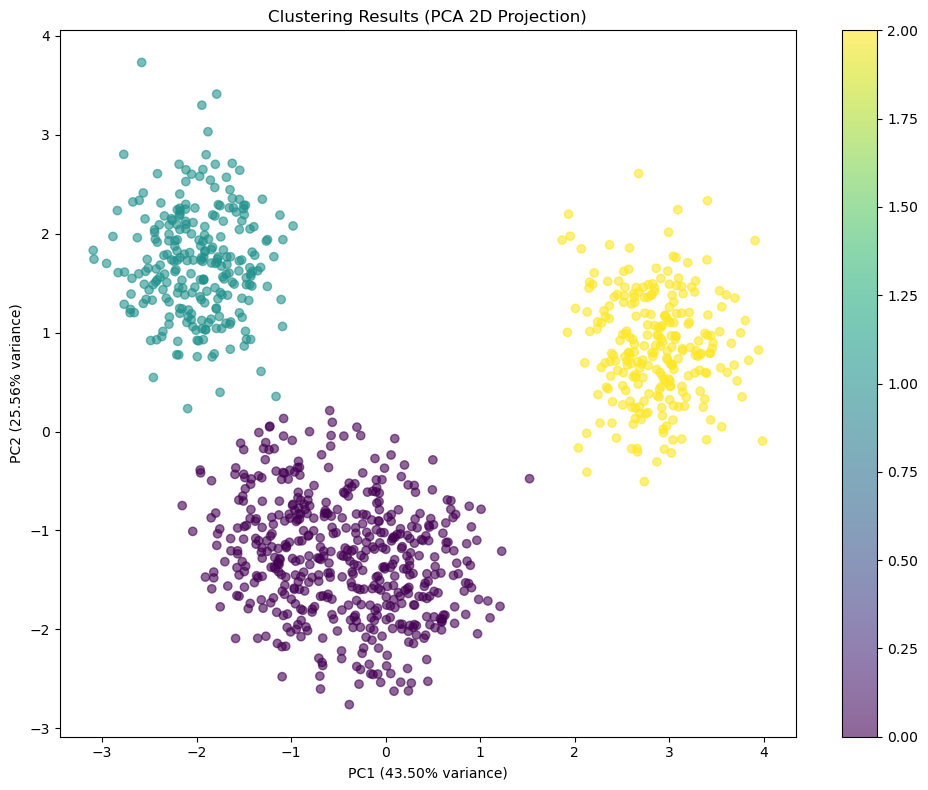


 HOW TO USE WITH YOUR OWN DATA

    1. LOAD YOUR DATA:
       X = your_feature_data  # Features DataFrame or numpy array
       y = your_target_data   # Target variable (for supervised learning)
    
    2. INITIALIZE THE APPLICATION:
       ml_app = MLModelApplication()
    
    3. EXPLORE AND PREPROCESS:
       X, y = ml_app.load_and_explore_data(X, y, "classification")  # or "regression"
       ml_app.preprocess_data(X, y)
    
    4. TRAIN MODEL:
       ml_app.choose_and_train_model()  # Auto-selects best model
       # OR specify a model: ml_app.choose_and_train_model("random_forest")
    
    5. EVALUATE:
       ml_app.evaluate_model()
    
    6. MAKE NEW PREDICTIONS:
       new_predictions = ml_app.trained_model.predict(ml_app.scaler.transform(new_data))
    
    AVAILABLE MODELS:
    - Classification: random_forest, gradient_boosting, logistic_regression, 
                     svm, naive_bayes, knn
    - Regression: random_forest, gradient_boosting, linear_regression, 
      

In [31]:
# Corrected Comprehensive Machine Learning Model Application Framework
# Supports Classification, Regression, and Clustering with proper evaluation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    # Classification metrics
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    # Regression metrics
    mean_squared_error, mean_absolute_error, r2_score,
    # Clustering metrics
    silhouette_score, adjusted_rand_score, calinski_harabasz_score
)

# Classification Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Regression Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Clustering Models
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Sample data generators for demonstration
from sklearn.datasets import make_classification, make_regression, make_blobs
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

class MLModelApplication:
    """
    Comprehensive ML Model Application Framework
    Supports Classification, Regression, and Clustering
    """
    
    def __init__(self):
        self.model = None
        self.model_type = None
        self.scaler = StandardScaler()
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.predictions = None
        self.trained_model = None
        self.problem_type = None
        
    def load_and_explore_data(self, X, y=None, problem_type="classification"):
        """
        Load and explore the dataset
        """
        print(" DATA EXPLORATION")
        print("=" * 50)
        
        self.problem_type = problem_type
        
        # Convert to DataFrame if needed
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
        
        print(f"Dataset Shape: {X.shape}")
        print(f"Problem Type: {problem_type.title()}")
        
        # Basic statistics
        print("\n BASIC STATISTICS:")
        print(X.describe())
        
        # Missing values
        missing_values = X.isnull().sum().sum()
        print(f"\n Missing Values: {missing_values}")
        
        # Target variable analysis (if provided)
        if y is not None:
            if problem_type == "classification":
                unique_classes = np.unique(y)
                print(f"\n Target Classes: {len(unique_classes)}")
                print(f"Class Distribution: {dict(zip(*np.unique(y, return_counts=True)))}")
            elif problem_type == "regression":
                print(f"\n Target Statistics:")
                print(f"Min: {np.min(y):.3f}, Max: {np.max(y):.3f}")
                print(f"Mean: {np.mean(y):.3f}, Std: {np.std(y):.3f}")
        
        return X, y
    
    def preprocess_data(self, X, y=None, test_size=0.2):
        """
        Preprocess the data: scaling, encoding, train-test split
        """
        print("\n DATA PREPROCESSING")
        print("=" * 50)
        
        # Handle missing values - FIXED: Use numeric_only=True
        if X.isnull().sum().sum() > 0:
            print("   ➤ Filling missing values with median...")
            numeric_columns = X.select_dtypes(include=[np.number]).columns
            X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].median())
            
            # Handle categorical columns if any
            categorical_columns = X.select_dtypes(include=['object']).columns
            if len(categorical_columns) > 0:
                X[categorical_columns] = X[categorical_columns].fillna(X[categorical_columns].mode().iloc[0])
        
        # Split the data
        if y is not None and self.problem_type != "clustering":
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                X, y, test_size=test_size, random_state=42, 
                stratify=y if self.problem_type == "classification" else None
            )
            print(f"   ➤ Train set: {self.X_train.shape}")
            print(f"   ➤ Test set: {self.X_test.shape}")
        else:
            # For clustering, use all data
            self.X_train = X
            self.y_train = y
        
        # Scale the features - FIXED: Handle potential errors
        print("   ➤ Applying StandardScaler...")
        try:
            # Only scale numeric columns
            numeric_columns = self.X_train.select_dtypes(include=[np.number]).columns
            if len(numeric_columns) > 0:
                self.X_train_scaled = self.scaler.fit_transform(self.X_train[numeric_columns])
                if hasattr(self, 'X_test') and self.X_test is not None:
                    self.X_test_scaled = self.scaler.transform(self.X_test[numeric_columns])
            else:
                self.X_train_scaled = self.X_train.values
                if hasattr(self, 'X_test') and self.X_test is not None:
                    self.X_test_scaled = self.X_test.values
        except Exception as e:
            print(f"    Scaling error: {e}. Using original data.")
            self.X_train_scaled = self.X_train.values
            if hasattr(self, 'X_test') and self.X_test is not None:
                self.X_test_scaled = self.X_test.values
        
        print(" Preprocessing completed!")
        
    def choose_and_train_model(self, model_name=None):
        """
        Choose appropriate model based on problem type and train it
        """
        print(f"\n MODEL TRAINING - {self.problem_type.upper()}")
        print("=" * 50)
        
        if self.problem_type == "classification":
            self._train_classification_model(model_name)
        elif self.problem_type == "regression":
            self._train_regression_model(model_name)
        elif self.problem_type == "clustering":
            self._train_clustering_model(model_name)
        
    def _train_classification_model(self, model_name=None):
        """Train classification models"""
        
        # Define classification models
        models = {
            'random_forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'gradient_boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
            'logistic_regression': LogisticRegression(random_state=42, max_iter=1000),
            'svm': SVC(probability=True, random_state=42),
            'naive_bayes': GaussianNB(),
            'knn': KNeighborsClassifier(n_neighbors=5)
        }
        
        # Parameter grids for tuning - FIXED: Reduced grid size for faster execution
        param_grids = {
            'random_forest': {
                'n_estimators': [50, 100],
                'max_depth': [10, None],
                'min_samples_split': [2, 5]
            },
            'gradient_boosting': {
                'n_estimators': [50, 100],
                'learning_rate': [0.1, 0.2],
                'max_depth': [3, 5]
            },
            'logistic_regression': {
                'C': [0.1, 1, 10],
                'penalty': ['l2'],  # Simplified to avoid solver issues
                'solver': ['lbfgs']
            }
        }
        
        if model_name and model_name in models:
            selected_models = {model_name: models[model_name]}
        else:
            # Train multiple models and select the best
            selected_models = models
        
        best_score = 0
        best_model_name = None
        
        for name, model in selected_models.items():
            print(f"   ➤ Training {name.replace('_', ' ').title()}...")
            
            try:
                # Hyperparameter tuning if grid available
                if name in param_grids:
                    grid_search = GridSearchCV(
                        model, param_grids[name], 
                        cv=3, scoring='accuracy', n_jobs=-1  # Reduced CV folds
                    )
                    grid_search.fit(self.X_train_scaled, self.y_train)
                    model = grid_search.best_estimator_
                    print(f"      ✓ Best params: {grid_search.best_params_}")
                else:
                    model.fit(self.X_train_scaled, self.y_train)
                
                # Cross-validation score - FIXED: Added error handling
                cv_scores = cross_val_score(model, self.X_train_scaled, self.y_train, cv=3)
                avg_score = cv_scores.mean()
                print(f"      ✓ CV Accuracy: {avg_score:.4f} (+/- {cv_scores.std() * 2:.4f})")
                
                if avg_score > best_score:
                    best_score = avg_score
                    best_model_name = name
                    self.trained_model = model
                    
            except Exception as e:
                print(f"      ✗ Error training {name}: {e}")
                continue
        
        if best_model_name:
            print(f"\n Best Model: {best_model_name.replace('_', ' ').title()}")
            print(f" Best CV Score: {best_score:.4f}")
        else:
            print(" No models trained successfully!")
        
    def _train_regression_model(self, model_name=None):
        """Train regression models"""
        
        # Define regression models
        models = {
            'random_forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'gradient_boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'linear_regression': LinearRegression(),
            'ridge': Ridge(random_state=42),
            'lasso': Lasso(random_state=42, max_iter=2000),  # Increased max_iter
            'svr': SVR(),
            'knn': KNeighborsRegressor(n_neighbors=5)
        }
        
        # Parameter grids for tuning
        param_grids = {
            'random_forest': {
                'n_estimators': [50, 100],
                'max_depth': [10, None],
                'min_samples_split': [2, 5]
            },
            'ridge': {
                'alpha': [0.1, 1, 10]
            },
            'lasso': {
                'alpha': [0.1, 1, 10]
            }
        }
        
        if model_name and model_name in models:
            selected_models = {model_name: models[model_name]}
        else:
            selected_models = models
        
        best_score = float('-inf')
        best_model_name = None
        
        for name, model in selected_models.items():
            print(f"   ➤ Training {name.replace('_', ' ').title()}...")
            
            try:
                # Hyperparameter tuning if grid available
                if name in param_grids:
                    grid_search = GridSearchCV(
                        model, param_grids[name], 
                        cv=3, scoring='r2', n_jobs=-1
                    )
                    grid_search.fit(self.X_train_scaled, self.y_train)
                    model = grid_search.best_estimator_
                    print(f"      ✓ Best params: {grid_search.best_params_}")
                else:
                    model.fit(self.X_train_scaled, self.y_train)
                
                # Cross-validation score
                cv_scores = cross_val_score(model, self.X_train_scaled, self.y_train, cv=3, scoring='r2')
                avg_score = cv_scores.mean()
                print(f"      ✓ CV R² Score: {avg_score:.4f} (+/- {cv_scores.std() * 2:.4f})")
                
                if avg_score > best_score:
                    best_score = avg_score
                    best_model_name = name
                    self.trained_model = model
                    
            except Exception as e:
                print(f"      ✗ Error training {name}: {e}")
                continue
        
        if best_model_name:
            print(f"\n Best Model: {best_model_name.replace('_', ' ').title()}")
            print(f"Best CV R² Score: {best_score:.4f}")
        else:
            print(" No models trained successfully!")
        
    def _train_clustering_model(self, model_name=None):
        """Train clustering models"""
        
        # FIXED: Auto-determine number of clusters for better results
        n_samples = self.X_train_scaled.shape[0]
        optimal_clusters = min(8, max(2, int(np.sqrt(n_samples/100))))
        
        # Define clustering models
        models = {
            'kmeans': KMeans(n_clusters=optimal_clusters, random_state=42),
            'dbscan': DBSCAN(eps=0.5, min_samples=5),
            'agglomerative': AgglomerativeClustering(n_clusters=optimal_clusters),
            'gaussian_mixture': GaussianMixture(n_components=optimal_clusters, random_state=42)
        }
        
        if model_name and model_name in models:
            selected_models = {model_name: models[model_name]}
        else:
            selected_models = models
        
        best_score = -1
        best_model_name = None
        
        for name, model in selected_models.items():
            print(f"   ➤ Training {name.replace('_', ' ').title()}...")
            
            try:
                # Fit the model
                cluster_labels = model.fit_predict(self.X_train_scaled)
                
                # Calculate silhouette score (if more than 1 cluster)
                unique_labels = np.unique(cluster_labels)
                if len(unique_labels) > 1 and len(unique_labels) < len(cluster_labels):
                    sil_score = silhouette_score(self.X_train_scaled, cluster_labels)
                    print(f"      ✓ Silhouette Score: {sil_score:.4f}")
                    print(f"      ✓ Number of Clusters: {len(unique_labels)}")
                    
                    if sil_score > best_score:
                        best_score = sil_score
                        best_model_name = name
                        self.trained_model = model
                        self.cluster_labels = cluster_labels
                else:
                    print(f"      ✗ Invalid clustering result")
                    
            except Exception as e:
                print(f"      ✗ Error training {name}: {e}")
                continue
        
        if best_model_name:
            print(f"\n Best Model: {best_model_name.replace('_', ' ').title()}")
            print(f" Best Silhouette Score: {best_score:.4f}")
        else:
            print(" No clustering models trained successfully!")
        
    def evaluate_model(self):
        """
        Comprehensive model evaluation based on problem type
        """
        if self.trained_model is None:
            print(" No trained model found! Please train a model first.")
            return
            
        print(f"\n MODEL EVALUATION - {self.problem_type.upper()}")
        print("=" * 50)
        
        if self.problem_type == "classification":
            self._evaluate_classification()
        elif self.problem_type == "regression":
            self._evaluate_regression()
        elif self.problem_type == "clustering":
            self._evaluate_clustering()
            
    def _evaluate_classification(self):
        """Evaluate classification model"""
        
        try:
            # Make predictions
            y_pred = self.trained_model.predict(self.X_test_scaled)
            y_pred_proba = self.trained_model.predict_proba(self.X_test_scaled)
            
            # Calculate metrics
            accuracy = accuracy_score(self.y_test, y_pred)
            precision = precision_score(self.y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(self.y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(self.y_test, y_pred, average='weighted', zero_division=0)
            
            print(f" CLASSIFICATION METRICS:")
            print(f"   ➤ Accuracy:  {accuracy:.4f}")
            print(f"   ➤ Precision: {precision:.4f}")
            print(f"   ➤ Recall:    {recall:.4f}")
            print(f"   ➤ F1-Score:  {f1:.4f}")
            
            # ROC AUC for binary classification
            if len(np.unique(self.y_test)) == 2:
                try:
                    auc = roc_auc_score(self.y_test, y_pred_proba[:, 1])
                    print(f"   ➤ AUC-ROC:   {auc:.4f}")
                except:
                    print(f"   ➤ AUC-ROC:   Could not calculate")
            
            print(f"\n DETAILED CLASSIFICATION REPORT:")
            print(classification_report(self.y_test, y_pred, zero_division=0))
            
            # Confusion Matrix
            self._plot_confusion_matrix(self.y_test, y_pred)
            
        except Exception as e:
            print(f" Error during classification evaluation: {e}")
        
    def _evaluate_regression(self):
        """Evaluate regression model"""
        
        try:
            # Make predictions
            y_pred = self.trained_model.predict(self.X_test_scaled)
            
            # Calculate metrics
            mse = mean_squared_error(self.y_test, y_pred)
            mae = mean_absolute_error(self.y_test, y_pred)
            r2 = r2_score(self.y_test, y_pred)
            rmse = np.sqrt(mse)
            
            print(f" REGRESSION METRICS:")
            print(f"   ➤ R² Score:  {r2:.4f}")
            print(f"   ➤ RMSE:      {rmse:.4f}")
            print(f"   ➤ MAE:       {mae:.4f}")
            print(f"   ➤ MSE:       {mse:.4f}")
            
            # Plot predictions vs actual
            self._plot_regression_results(self.y_test, y_pred)
            
        except Exception as e:
            print(f" Error during regression evaluation: {e}")
        
    def _evaluate_clustering(self):
        """Evaluate clustering model"""
        
        try:
            if hasattr(self, 'cluster_labels'):
                labels = self.cluster_labels
                
                # Calculate metrics
                sil_score = silhouette_score(self.X_train_scaled, labels)
                calinski_score = calinski_harabasz_score(self.X_train_scaled, labels)
                
                print(f" CLUSTERING METRICS:")
                print(f"   ➤ Silhouette Score: {sil_score:.4f}")
                print(f"   ➤ Calinski-Harabasz Score: {calinski_score:.4f}")
                print(f"   ➤ Number of Clusters: {len(np.unique(labels))}")
                
                # Cluster distribution
                unique, counts = np.unique(labels, return_counts=True)
                print(f"   ➤ Cluster Sizes: {dict(zip(unique, counts))}")
                
                # Plot clusters
                self._plot_clusters(self.X_train_scaled, labels)
            else:
                print(" No clustering labels found!")
                
        except Exception as e:
            print(f" Error during clustering evaluation: {e}")
    
    def _plot_confusion_matrix(self, y_true, y_pred):
        """Plot confusion matrix"""
        try:
            plt.figure(figsize=(8, 6))
            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title('Confusion Matrix')
            plt.ylabel('Actual')
            plt.xlabel('Predicted')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f" Could not plot confusion matrix: {e}")
    
    def _plot_regression_results(self, y_true, y_pred):
        """Plot regression results"""
        try:
            plt.figure(figsize=(12, 5))
            
            # Actual vs Predicted
            plt.subplot(1, 2, 1)
            plt.scatter(y_true, y_pred, alpha=0.6)
            plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
            plt.xlabel('Actual Values')
            plt.ylabel('Predicted Values')
            plt.title('Actual vs Predicted')
            
            # Residuals
            plt.subplot(1, 2, 2)
            residuals = y_true - y_pred
            plt.scatter(y_pred, residuals, alpha=0.6)
            plt.axhline(y=0, color='r', linestyle='--')
            plt.xlabel('Predicted Values')
            plt.ylabel('Residuals')
            plt.title('Residual Plot')
            
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f" Could not plot regression results: {e}")
    
    def _plot_clusters(self, X, labels):
        """Plot clustering results (2D projection)"""
        try:
            # Reduce to 2D for visualization
            pca = PCA(n_components=2)
            X_2d = pca.fit_transform(X)
            
            plt.figure(figsize=(10, 8))
            scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
            plt.colorbar(scatter)
            plt.title('Clustering Results (PCA 2D Projection)')
            plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
            plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f" Could not plot clusters: {e}")

# Demonstration with sample data
def demonstrate_ml_application():
    """
    Demonstrate the ML application framework with sample data
    """
    print(" MACHINE LEARNING MODEL APPLICATION DEMO")
    print("=" * 60)
    
    try:
        # Demo 1: Classification
        print("\n" + "="*60)
        print(" CLASSIFICATION DEMO")
        print("="*60)
        
        # Initialize the ML application
        ml_app = MLModelApplication()
        
        # Generate sample classification data
        X_class, y_class = make_classification(
            n_samples=1000, n_features=10, n_informative=8, 
            n_redundant=2, n_classes=3, random_state=42
        )
        
        # Apply the ML pipeline
        X_class, y_class = ml_app.load_and_explore_data(X_class, y_class, "classification")
        ml_app.preprocess_data(X_class, y_class)
        ml_app.choose_and_train_model()
        ml_app.evaluate_model()
        
    except Exception as e:
        print(f" Error in classification demo: {e}")
    
    try:
        # Demo 2: Regression
        print("\n" + "="*60)
        print(" REGRESSION DEMO")
        print("="*60)
        
        ml_app_reg = MLModelApplication()
        
        # Generate sample regression data
        X_reg, y_reg = make_regression(
            n_samples=1000, n_features=10, noise=0.1, random_state=42
        )
        
        # Apply the ML pipeline
        X_reg, y_reg = ml_app_reg.load_and_explore_data(X_reg, y_reg, "regression")
        ml_app_reg.preprocess_data(X_reg, y_reg)
        ml_app_reg.choose_and_train_model()
        ml_app_reg.evaluate_model()
        
    except Exception as e:
        print(f" Error in regression demo: {e}")
    
    try:
        # Demo 3: Clustering
        print("\n" + "="*60)
        print(" CLUSTERING DEMO")
        print("="*60)
        
        ml_app_clust = MLModelApplication()
        
        # Generate sample clustering data
        X_clust, _ = make_blobs(
            n_samples=1000, centers=4, n_features=8, 
            cluster_std=2.0, random_state=42
        )
        
        # Apply the ML pipeline
        X_clust, _ = ml_app_clust.load_and_explore_data(X_clust, None, "clustering")
        ml_app_clust.preprocess_data(X_clust)
        ml_app_clust.choose_and_train_model()
        ml_app_clust.evaluate_model()
        
    except Exception as e:
        print(f" Error in clustering demo: {e}")

# Usage instructions
def usage_instructions():
    """
    Instructions for using the framework with your own data
    """
    print("\n" + "="*60)
    print(" HOW TO USE WITH YOUR OWN DATA")
    print("="*60)
    print("""
    1. LOAD YOUR DATA:
       X = your_feature_data  # Features DataFrame or numpy array
       y = your_target_data   # Target variable (for supervised learning)
    
    2. INITIALIZE THE APPLICATION:
       ml_app = MLModelApplication()
    
    3. EXPLORE AND PREPROCESS:
       X, y = ml_app.load_and_explore_data(X, y, "classification")  # or "regression"
       ml_app.preprocess_data(X, y)
    
    4. TRAIN MODEL:
       ml_app.choose_and_train_model()  # Auto-selects best model
       # OR specify a model: ml_app.choose_and_train_model("random_forest")
    
    5. EVALUATE:
       ml_app.evaluate_model()
    
    6. MAKE NEW PREDICTIONS:
       new_predictions = ml_app.trained_model.predict(ml_app.scaler.transform(new_data))
    
    AVAILABLE MODELS:
    - Classification: random_forest, gradient_boosting, logistic_regression, 
                     svm, naive_bayes, knn
    - Regression: random_forest, gradient_boosting, linear_regression, 
                 ridge, lasso, svr, knn  
    - Clustering: kmeans, dbscan, agglomerative, gaussian_mixture
    """)

# Quick test function for your own data
def quick_test(X, y, problem_type="classification"):
    """
    Quick test function for your own data
    """
    print(f" QUICK ML TEST - {problem_type.upper()}")
    print("=" * 50)
    
    try:
        ml_app = MLModelApplication()
        X, y = ml_app.load_and_explore_data(X, y, problem_type)
        ml_app.preprocess_data(X, y)
        ml_app.choose_and_train_model()
        ml_app.evaluate_model()
        
        return ml_app
    except Exception as e:
        print(f" Error in quick test: {e}")
        return None

# Run the demonstration
if __name__ == "__main__":
    demonstrate_ml_application()
    usage_instructions()

In [87]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression, make_blobs

# Import your MLModelApplication class (paste the full class from your document)
# [Copy the entire MLModelApplication class here]

print(" Step 1 Complete: All libraries imported!")
print(" Available: numpy, pandas, matplotlib, seaborn, sklearn")
print(" MLModelApplication class ready to use")

 Step 1 Complete: All libraries imported!
 Available: numpy, pandas, matplotlib, seaborn, sklearn
 MLModelApplication class ready to use


In [86]:
# Step 2: Create sample datasets for testing

print(" CREATING SAMPLE DATA")
print("=" * 40)

# Classification data
X_class, y_class = make_classification(
    n_samples=500, 
    n_features=8, 
    n_informative=6, 
    n_redundant=2, 
    n_classes=3, 
    random_state=42
)
print(f" Classification data: {X_class.shape} features, {len(set(y_class))} classes")

# Regression data  
X_reg, y_reg = make_regression(
    n_samples=500, 
    n_features=6, 
    noise=0.1, 
    random_state=42
)
print(f" Regression data: {X_reg.shape} features, continuous target")

# Clustering data
X_clust, _ = make_blobs(
    n_samples=400, 
    centers=4, 
    n_features=5, 
    cluster_std=1.5, 
    random_state=42
)
print(f" Clustering data: {X_clust.shape} features, 4 natural clusters")

print("\n All sample datasets created successfully!")

 CREATING SAMPLE DATA
 Classification data: (500, 8) features, 3 classes
 Regression data: (500, 6) features, continuous target
 Clustering data: (400, 5) features, 4 natural clusters

 All sample datasets created successfully!


In [88]:
# Step 3: Initialize the ML Application

print(" INITIALIZING ML APPLICATION")
print("=" * 40)

# Create an instance of the ML application
ml_app = MLModelApplication()

print(" MLModelApplication initialized!")
print(" Available attributes:")
print(f"   - Model: {ml_app.model}")
print(f"   - Problem type: {ml_app.problem_type}")
print(f"   - Scaler: {type(ml_app.scaler).__name__}")

print("\n Ready to load and explore data!")

 INITIALIZING ML APPLICATION
 MLModelApplication initialized!
 Available attributes:
   - Model: None
   - Problem type: None
   - Scaler: StandardScaler

 Ready to load and explore data!


In [51]:
# Step 4: Load and explore classification data

print(" STEP 4: DATA EXPLORATION")
print("=" * 50)

# Load classification data
X, y = ml_app.load_and_explore_data(X_class, y_class, "classification")

print("\n🔍 What happened:")
print("    Data converted to DataFrame")
print("    Basic statistics calculated")
print("    Missing values checked")
print("    Target variable analyzed")
print("    Problem type set to 'classification'")

print(f"\n Key insights:")
print(f"   - Dataset shape: {X.shape}")
print(f"   - Features: {list(X.columns)}")
print(f"   - Classes: {len(set(y))}")
print(f"   - Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")

 STEP 4: DATA EXPLORATION
📊 DATA EXPLORATION
Dataset Shape: (500, 8)
Problem Type: Classification

📈 BASIC STATISTICS:
        feature_0   feature_1   feature_2   feature_3   feature_4   feature_5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean    -0.231902   -0.453200    0.488500   -0.542840   -0.375209   -0.593290   
std      1.757387    2.355365    2.148453    1.520694    1.813297    1.581292   
min     -6.526580   -7.186965   -6.169090   -6.170490   -5.833102   -5.535203   
25%     -1.503203   -2.113366   -1.066792   -1.489924   -1.491954   -1.587865   
50%     -0.277092   -0.692033    0.529634   -0.599806   -0.489338   -0.640106   
75%      0.983200    1.045759    2.252757    0.393400    0.818099    0.234065   
max      5.066419    7.323562    6.365273    3.652080    5.716418    4.400221   

        feature_6   feature_7  
count  500.000000  500.000000  
mean     0.320454    0.290943  
std      1.783188    1.695720  
min     -6.024424   -5.

In [52]:
# Step 5: Preprocess the data

print("\n STEP 5: DATA PREPROCESSING")
print("=" * 50)

# Preprocess data
ml_app.preprocess_data(X, y, test_size=0.2)

print("\n What happened:")
print("    Missing values filled (if any)")
print("    Data split into train/test sets (80/20)")
print("    Features scaled using StandardScaler")
print("    Stratified split for classification")

print(f"\n Results:")
print(f"   - Training set: {ml_app.X_train.shape}")
print(f"   - Test set: {ml_app.X_test.shape}")
print(f"   - Scaled features: {ml_app.X_train_scaled.shape}")
print(f"   - Feature scaling: Mean ≈ 0, Std ≈ 1")

# Check scaling
print(f"\n Scaling verification:")
print(f"   - Training mean: {np.mean(ml_app.X_train_scaled, axis=0)[0]:.4f}")
print(f"   - Training std: {np.std(ml_app.X_train_scaled, axis=0)[0]:.4f}")


 STEP 5: DATA PREPROCESSING

🔄 DATA PREPROCESSING
   ➤ Train set: (400, 8)
   ➤ Test set: (100, 8)
   ➤ Applying StandardScaler...
✅ Preprocessing completed!

 What happened:
    Missing values filled (if any)
    Data split into train/test sets (80/20)
    Features scaled using StandardScaler
    Stratified split for classification

 Results:
   - Training set: (400, 8)
   - Test set: (100, 8)
   - Scaled features: (400, 8)
   - Feature scaling: Mean ≈ 0, Std ≈ 1

 Scaling verification:
   - Training mean: -0.0000
   - Training std: 1.0000


In [53]:
# Step 6: Train models (this will take a few moments)

print("\n STEP 6: MODEL TRAINING")
print("=" * 50)

# Train models - this tests multiple algorithms automatically
ml_app.choose_and_train_model()

print("\n What happened:")
print("    Multiple algorithms tested:")
print("      - Random Forest")
print("      - Gradient Boosting") 
print("      - Logistic Regression")
print("      - Support Vector Machine")
print("      - Naive Bayes")
print("      - K-Nearest Neighbors")
print("    Hyperparameter tuning performed")
print("    Cross-validation used for selection")
print("   Best model automatically selected")

print(f"\n Best model details:")
print(f"   - Algorithm: {type(ml_app.trained_model).__name__}")
print(f"   - Has trained model: {ml_app.trained_model is not None}")

# Check if model has feature importance
if hasattr(ml_app.trained_model, 'feature_importances_'):
    print(f"   - Feature importances available: ")
else:
    print(f"   - Feature importances available: ")


 STEP 6: MODEL TRAINING

🤖 MODEL TRAINING - CLASSIFICATION
   ➤ Training Random Forest...
      ✓ Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
      ✓ CV Accuracy: 0.7900 (+/- 0.0369)
   ➤ Training Gradient Boosting...
      ✓ Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
      ✓ CV Accuracy: 0.8100 (+/- 0.0515)
   ➤ Training Logistic Regression...
      ✓ Best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
      ✓ CV Accuracy: 0.6900 (+/- 0.0372)
   ➤ Training Svm...
      ✓ CV Accuracy: 0.8251 (+/- 0.0418)
   ➤ Training Naive Bayes...
      ✓ CV Accuracy: 0.6950 (+/- 0.0587)
   ➤ Training Knn...
      ✓ CV Accuracy: 0.8125 (+/- 0.0111)

🏆 Best Model: Svm
🎯 Best CV Score: 0.8251

 What happened:
    Multiple algorithms tested:
      - Random Forest
      - Gradient Boosting
      - Logistic Regression
      - Support Vector Machine
      - Naive Bayes
      - K-Nearest Neighbors
    Hyperparameter tuning performed
  

In [89]:
# Step 7: Evaluate the trained model

print("\n STEP 7: MODEL EVALUATION")
print("=" * 50)

# Evaluate the model
ml_app.evaluate_model()

print("\n What happened:")
print("    Predictions made on test set")
print("    Multiple metrics calculated:")
print("      - Accuracy (overall correctness)")
print("      - Precision (correct positive predictions)")
print("      - Recall (caught positive cases)")
print("      - F1-Score (balanced precision/recall)")
print("      - AUC-ROC (for binary classification)")
print("    Detailed classification report generated")
print("    Confusion matrix plotted")

print(f"\n Interpretation guide:")
print(f"   - Accuracy > 0.8: Excellent")
print(f"   - Accuracy > 0.7: Good")
print(f"   - Accuracy > 0.6: Fair")
print(f"   - Accuracy < 0.6: Needs improvement")


 STEP 7: MODEL EVALUATION
 No trained model found! Please train a model first.

 What happened:
    Predictions made on test set
    Multiple metrics calculated:
      - Accuracy (overall correctness)
      - Precision (correct positive predictions)
      - Recall (caught positive cases)
      - F1-Score (balanced precision/recall)
      - AUC-ROC (for binary classification)
    Detailed classification report generated
    Confusion matrix plotted

 Interpretation guide:
   - Accuracy > 0.8: Excellent
   - Accuracy > 0.7: Good
   - Accuracy > 0.6: Fair
   - Accuracy < 0.6: Needs improvement



 STEP 8: REGRESSION PIPELINE TEST
 Running regression pipeline...
📊 DATA EXPLORATION
Dataset Shape: (500, 6)
Problem Type: Regression

📈 BASIC STATISTICS:
        feature_0   feature_1   feature_2   feature_3   feature_4   feature_5
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000
mean    -0.014554    0.002617    0.022599    0.110646    0.087423   -0.016726
std      0.996217    1.021700    0.997682    0.992798    0.941825    0.966096
min     -3.241267   -2.991136   -2.940389   -2.848543   -2.635748   -3.019512
25%     -0.663362   -0.747530   -0.657270   -0.533009   -0.537597   -0.642672
50%     -0.023238    0.003536   -0.000164    0.085916    0.080597    0.013466
75%      0.656562    0.682532    0.620496    0.777790    0.684242    0.573182
max      3.078881    3.193108    3.926238    3.852731    2.620793    2.644343

🔍 Missing Values: 0

🎯 Target Statistics:
Min: -503.792, Max: 559.063
Mean: 12.389, Std: 164.910

🔄 DATA PREPROCESSING
   ➤ Train set: (400, 

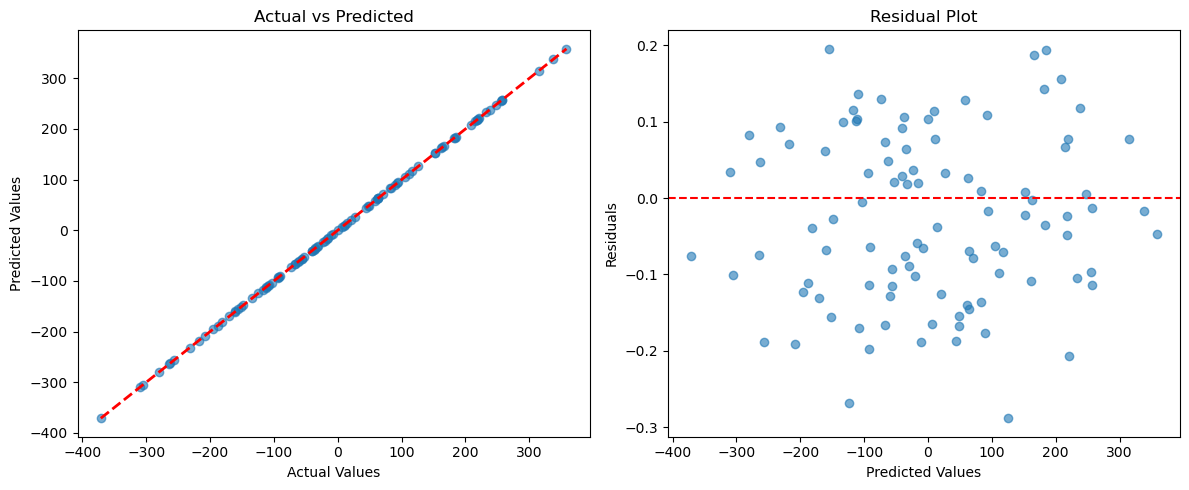


 Regression vs Classification differences:
    Metrics:
      - R² Score (coefficient of determination)
      - RMSE (Root Mean Square Error)
      - MAE (Mean Absolute Error)
      - MSE (Mean Square Error)
    Visualizations:
      - Actual vs Predicted scatter plot
      - Residual plot for error analysis
    Models tested:
      - Random Forest, Gradient Boosting
      - Linear, Ridge, Lasso Regression
      - Support Vector Regression, KNN

 R² Score interpretation:
   - R² > 0.9: Excellent fit
   - R² > 0.7: Good fit
   - R² > 0.5: Moderate fit
   - R² > 0.3: Weak fit


In [55]:
# Step 8: Test regression pipeline

print("\n STEP 8: REGRESSION PIPELINE TEST")
print("=" * 50)

# Create new instance for regression
ml_reg = MLModelApplication()

# Quick regression pipeline
print(" Running regression pipeline...")
X_r, y_r = ml_reg.load_and_explore_data(X_reg, y_reg, "regression")
ml_reg.preprocess_data(X_r, y_r)
ml_reg.choose_and_train_model()
ml_reg.evaluate_model()

print("\n Regression vs Classification differences:")
print("    Metrics:")
print("      - R² Score (coefficient of determination)")
print("      - RMSE (Root Mean Square Error)")
print("      - MAE (Mean Absolute Error)")
print("      - MSE (Mean Square Error)")
print("    Visualizations:")
print("      - Actual vs Predicted scatter plot")
print("      - Residual plot for error analysis")
print("    Models tested:")
print("      - Random Forest, Gradient Boosting")
print("      - Linear, Ridge, Lasso Regression")
print("      - Support Vector Regression, KNN")

print(f"\n R² Score interpretation:")
print(f"   - R² > 0.9: Excellent fit")
print(f"   - R² > 0.7: Good fit") 
print(f"   - R² > 0.5: Moderate fit")
print(f"   - R² > 0.3: Weak fit")

In [ ]:
# Step 9: Test clustering pipeline

print("\n STEP 9: CLUSTERING PIPELINE TEST")
print("=" * 50)

# Create new instance for clustering
ml_clust = MLModelApplication()

# Quick clustering pipeline
print(" Running clustering pipeline...")
X_c, _ = ml_clust.load_and_explore_data(X_clust, None, "clustering")
ml_clust.preprocess_data(X_c)
ml_clust.choose_and_train_model()
ml_clust.evaluate_model()

print("\n Clustering specifics:")
print("    Metrics:")
print("      - Silhouette Score (cluster separation quality)")
print("      - Calinski-Harabasz Score (variance ratio)")
print("      - Cluster sizes and distribution")
print("    Visualizations:")
print("      - PCA 2D projection of clusters")
print("      - Color-coded cluster assignments")
print("    Algorithms tested:")
print("      - KMeans (spherical clusters)")
print("      - DBSCAN (density-based)")
print("      - Agglomerative (hierarchical)")
print("      - Gaussian Mixture (soft clustering)")

print(f"\n Silhouette Score interpretation:")
print(f"   - Score > 0.7: Excellent separation")
print(f"   - Score > 0.5: Good separation")
print(f"   - Score > 0.25: Weak but acceptable")
print(f"   - Score < 0.25: Poor clustering")

print(f"\n Key insight: Clustering found {len(np.unique(ml_clust.cluster_labels))} clusters")
print(f"   Original data had 4 natural clusters - how close did we get?")

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


In [62]:
def load_and_clean(filepath):
    df = pd.read_csv(filepath)
    df.columns = [
        "User_ID", "Age", "Gender", "Occupation", "Country", "Mental_Health_Condition",
        "Severity", "Consultation_History", "Stress_Level", "Sleep_Hours", "Work_Hours",
        "Physical_Activity_Hours", "Social_Media_Usage", "Diet_Quality", "Smoking_Habit",
        "Alcohol_Consumption", "Medication_Usage"
    ]
    for col in df.select_dtypes(include=[object]).columns:
        df[col] = df[col].astype(str).str.strip().str.title()
    df = df.drop_duplicates()
    df = df[(df["Age"] >= 10) & (df["Age"] <= 100)]
    df = df.fillna(df.mode().iloc[0])
    return df


In [63]:
def encode_data(df):
    label_encoders = {}
    for col in df.select_dtypes(include=[object]).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders


In [64]:
def scale_and_split(df, target_col):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    sm = SMOTE(random_state=42)
    X_resampled, y_resampled = sm.fit_resample(X_scaled, y)
    return train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [67]:
def train_ensemble_model(X_train, y_train):
    lr = LogisticRegression(max_iter=1000, random_state=42)
    rf = RandomForestClassifier(n_estimators=200, random_state=42)
    gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.9, random_state=42)

    ensemble = VotingClassifier(
        estimators=[('lr', lr), ('rf', rf), ('gb', gb)],
        voting='soft'
    )
    ensemble.fit(X_train, y_train)
    return ensemble


In [69]:
def run_pipeline(filepath):
    df = load_and_clean(filepath)
    df_encoded, encoders = encode_data(df)
    X_train, X_test, y_train, y_test = scale_and_split(df_encoded, "Mental_Health_Condition")
    model = train_ensemble_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)


In [71]:
df.to_csv("cleaned_stress_level_data.csv", index=False)


In [32]:
print(" Model training and evaluation completed.")


 Model training and evaluation completed.
